# **Session 18: Convolutional Neural Networks **


## PY599 (Fall 2018): Applied Artificial Intelligence
## NC State University
###Dr. Behnam Kia
### https://appliedai.wordpress.ncsu.edu/


**Disclaimer**: Please note that these codes are simplified version of the algorithms, and they may not give the best, or expected performance that you could possibly get from these algorithms. The aim of this notebook is to help you understand the basics and the essence of these algorithms, and experiment with them. These basic codes are not deployment-ready or free-of-errors for real-world applications. To learn more about these algorithms please refer to text books that specifically study these algorithms, or contact me. - Behnam Kia

## Importing modules, downloading data, and preprocessing

In [0]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
seed = 7
numpy.random.seed(seed)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

## Define and create CNN model

In [0]:
	CNN_model = Sequential()
	CNN_model.add(Conv2D(30, (3, 3), input_shape=(1, 28, 28), activation='relu'))
	CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
	CNN_model.add(Conv2D(15, (3, 3), activation='relu'))
	CNN_model.add(MaxPooling2D(pool_size=(2, 2)))
	CNN_model.add(Flatten())
	CNN_model.add(Dense(128, activation='relu'))
	CNN_model.add(Dense(50, activation='relu'))
	CNN_model.add(Dense(num_classes, activation='softmax'))
	CNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
CNN_model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=2)


Epoch 1/10
 - 4s - loss: 0.3758 - acc: 0.8825
Epoch 2/10
 - 3s - loss: 0.0826 - acc: 0.9751
Epoch 3/10
 - 3s - loss: 0.0568 - acc: 0.9828
Epoch 4/10
 - 3s - loss: 0.0454 - acc: 0.9860
Epoch 5/10
 - 3s - loss: 0.0378 - acc: 0.9879
Epoch 6/10
 - 3s - loss: 0.0308 - acc: 0.9906
Epoch 7/10
 - 3s - loss: 0.0280 - acc: 0.9911
Epoch 8/10
 - 3s - loss: 0.0234 - acc: 0.9922
Epoch 9/10
 - 3s - loss: 0.0204 - acc: 0.9931
Epoch 10/10
 - 3s - loss: 0.0182 - acc: 0.9939


In [43]:
scores = CNN_model.evaluate(X_test, y_test, verbose=2)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

CNN Accuracy: 98.73%


In [44]:
CNN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 28, 28)        300       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 30, 14, 14)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 14, 14)        4065      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 7, 7)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 735)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               94208     
_________________________________________________________________
dense_23 (Dense)             (None, 50)                6450      
__________

## Rotating images

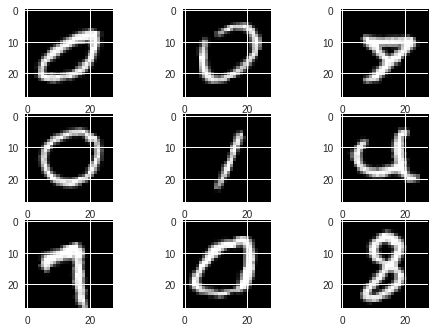

In [24]:

	
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras import backend as K
K.set_image_dim_ordering('th')

datagen = ImageDataGenerator(rotation_range=45)#   <======== Change roataion value here
datagen.fit(X_test)


for X_batch, y_batch in datagen.flow(X_test, y_test, batch_size=1000):
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	pyplot.show()
	break

  
  
  

	

In [0]:
from keras.utils import np_utils

X_batch = X_batch / 255
correct_indexes=y_batch
y_batch = np_utils.to_categorical(y_batch)


In [26]:
import numpy as np


scores = CNN_model.evaluate(X_batch, y_batch, verbose=0)
Y_batch_hat = CNN_model.predict(X_batch, verbose=0)

print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 86.70%


7
4
9
7
0
1
9
1
2


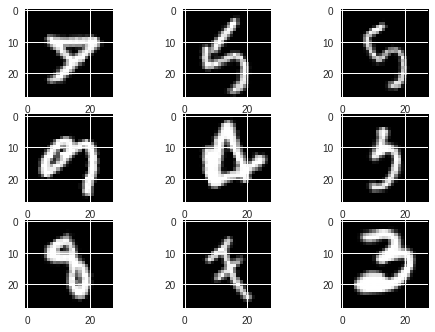

In [27]:
result_hat=np.argmax(Y_batch_hat,axis=1)

error=0
index=0


while(error<9):
  if(result_hat[index] != correct_indexes[index]):
    print(result_hat[index])
    pyplot.subplot(330 + 1 + error)
    pyplot.imshow(X_batch[index].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    error=error+1
  index=index+1
pyplot.show()


## Translating (shifting) Images

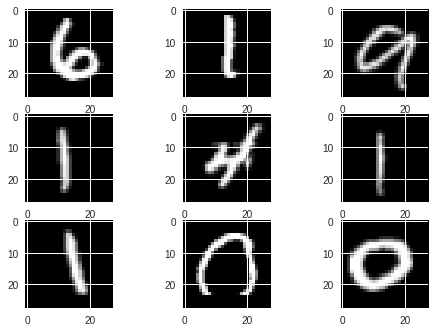

In [0]:

	
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
from keras import backend as K
K.set_image_dim_ordering('th')

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)#   <======== Change shift value here
datagen.fit(X_test)


for X_batch, y_batch in datagen.flow(X_test, y_test, batch_size=1000):
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	pyplot.show()
	break

  
  
  

	

In [0]:
from keras.utils import np_utils

X_batch = X_batch / 255
correct_indexes=y_batch
y_batch = np_utils.to_categorical(y_batch)

In [0]:



scores = CNN_model.evaluate(X_batch, y_batch, verbose=0)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 92.50%
